# REMINDER: all Packages must be here at the top, not in the individual code cells

### <center>**Appendix**</center>

We're looking for ways to utilize a predictive model that can help us identify video games that have a high probability of receiving high MetaCritic Review Scores. By doing so, we hope to optimize our marketing resources and increase the chances of success for our titles. 

In [74]:
### Python Packages used throughout the notebook: ###
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from IPython.display import display, HTML
from scipy.stats import trim_mean
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)


# Set display options to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [75]:
### Connection info for GitHub File ### 
url = 'https://github.com/TexasTori/502_group4/raw/47991b001ffd176ab156b992140cb9d3d3a51df1/Group_4_Data.csv'

### Loading Data for Game scores and descriptions ###
data = pd.read_csv(url, encoding='latin-1')

### Set up to automate files print location for team ###
cwd = os.getcwd() 
log_prefix = os.path.join(cwd,'log_files')
print(log_prefix)

c:\Users\ToriT\502_group4\log_files


### Spliting Data Into Training and Test Data

In [76]:
### Creating the train and test sets.  33% for the test. ###
data_train, data_test = train_test_split(data, test_size = 0.33, random_state = 7)

data.shape

(393, 39)

To begin our exploration and data-cleaning activities, we first split the data into training and cleaning sets, comprising 67% and 33% of the data, respectively. This step was taken to ensure the integrity of our analysis and maintain adherence to the assumption that we would be modeling off of a known training set and subsequently be provided with a test data set for evaluation.

In [77]:
data_train.shape

(263, 39)

In [78]:
data_test.shape

(130, 39)

In [79]:
### Inspect Train data ###
data_train.head()

,ID,ESA2008,ESA2009,ESA2010,ESA2011,ESA2012,ESA2013,ESA2014,ESA2015,ESA2016,...,Protagonist,MainPC,PCTYPE,CharacterPrespective,Narrative,DigitalGameMainGenre,DigitalGameSecondaryGenre,DigitalGameThirdGenre,DigitalGameGenreOTHER,MetaCritic Review Score
258,259,0,0,0,0,1,0,0,0,0,...,0,AxtontheCommando,3,1,1,ActionAdventure,FirstPersonShooter,RPG,,91.00
18,19,0,0,0,0,0,0,0,0,0,...,Gwydion,Gwydion,3,3,1,Adventure,,,,NaN
305,306,0,0,0,0,0,0,0,0,0,...,TheInquisitor,TheInquisitor,3,3,1,RPG,,,,89.00
20,21,0,0,0,0,0,0,0,0,0,...,Link,Link,3,3,1,ActionAdventure,,,,84.00
55,56,0,0,0,0,0,0,0,0,0,...,0,Multiple,4,2,1,Strategy,,,,94.00


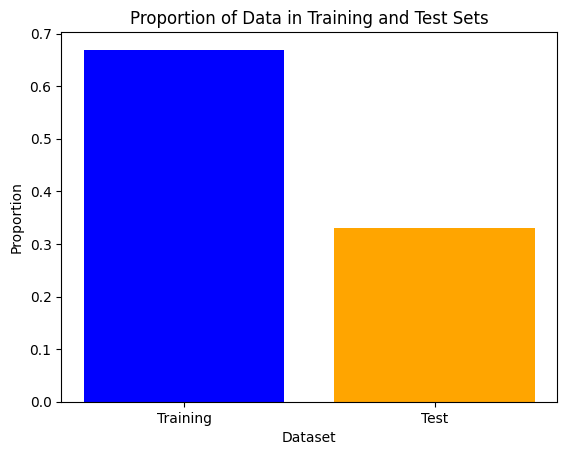

In [80]:
### Calculate proportions ###
train_proportion = len(data_train) / len(data)
test_proportion = len(data_test) / len(data)

### Create a bar graph to confirm proportions ###
proportions = [train_proportion, test_proportion]
labels = ['Training', 'Test']

plt.bar(labels, proportions, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Proportion')
plt.title('Proportion of Data in Training and Test Sets')
plt.show()

### Exploratory Data Analysis (EDA)

In [81]:
### Checking for any NAN cells ###
data_train.isnull().sum()

ID                            0
ESA2008                       0
ESA2009                       0
ESA2010                       0
ESA2011                       0
ESA2012                       0
ESA2013                       0
ESA2014                       0
ESA2015                       0
ESA2016                       0
ESA2017                       0
ESA2018                       0
ESACount                      0
EuroGamer                     0
GamesRadar                    0
Guardien                      0
IGN                           0
MetaCritic                    0
Polygon                       0
TIME                          0
CriticCount                   0
TotalCitationsCount           0
DigitalGame                   0
Year                          0
YearInterval                  0
Series                        0
Mode                          0
SpatialDimensionality         0
Platformscount                0
Protagonist                   0
MainPC                        0
PCTYPE  

In [83]:
data_train.dtypes

ID                             int64
ESA2008                        int64
ESA2009                        int64
ESA2010                        int64
ESA2011                        int64
ESA2012                        int64
ESA2013                        int64
ESA2014                        int64
ESA2015                        int64
ESA2016                        int64
ESA2017                        int64
ESA2018                        int64
ESACount                       int64
EuroGamer                      int64
GamesRadar                     int64
Guardien                       int64
IGN                            int64
MetaCritic                     int64
Polygon                        int64
TIME                           int64
CriticCount                    int64
TotalCitationsCount            int64
DigitalGame                   object
Year                           int64
YearInterval                  object
Series                        object
Mode                           int64
S

In [84]:
data_train.describe()

,ID,ESA2008,ESA2009,ESA2010,ESA2011,ESA2012,ESA2013,ESA2014,ESA2015,ESA2016,...,TIME,CriticCount,TotalCitationsCount,Year,Mode,Platformscount,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
count,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,...,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,235.00
mean,197.34,0.03,0.05,0.05,0.05,0.05,0.06,0.06,0.05,0.05,...,0.11,1.21,1.75,2006.07,2.23,4.94,2.61,2.51,0.69,85.91
std,114.32,0.17,0.22,0.22,0.22,0.21,0.24,0.24,0.21,0.21,...,0.32,1.29,1.29,9.72,0.99,3.64,1.40,1.37,0.46,9.02
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1972.00,0.00,0.00,0.00,0.00,0.00,42.00
25%,97.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,2001.00,1.00,2.00,2.00,1.00,0.00,83.00
50%,201.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,2009.00,3.00,4.00,3.00,3.00,1.00,88.00
75%,294.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.00,2.00,2013.00,3.00,7.00,3.00,3.00,1.00,92.00
max,393.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,6.00,11.00,2020.00,3.00,20.00,5.00,7.00,1.00,98.00


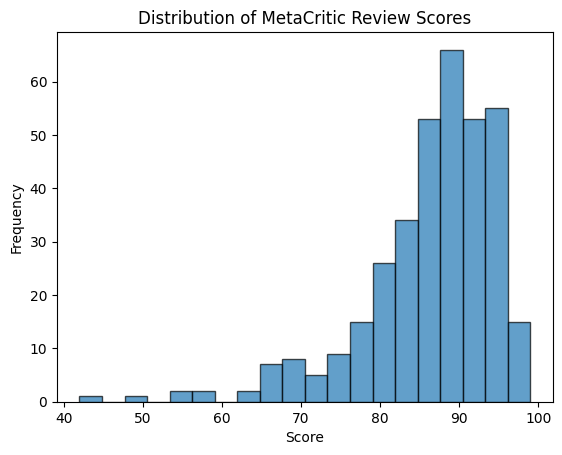

In [85]:
### Histogram of the Target Feature MetaCritic Review Score ###

plt.hist(data['MetaCritic Review Score'].dropna(), bins=20, edgecolor='black', alpha = 0.7)
plt.title('Distribution of MetaCritic Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Upon reviewing our Target value, MetaCritic Review Score, we have observed that our data is heavily left-skewed, and scores lower than 40 are absent. This finding indicates that the dataset may not represent the entire population, and there could be a potential bias in the data. However, for the purpose of this project, we are continuing to test the idea that MetaCritic Review Score can be predicted based on the games and features provided. 

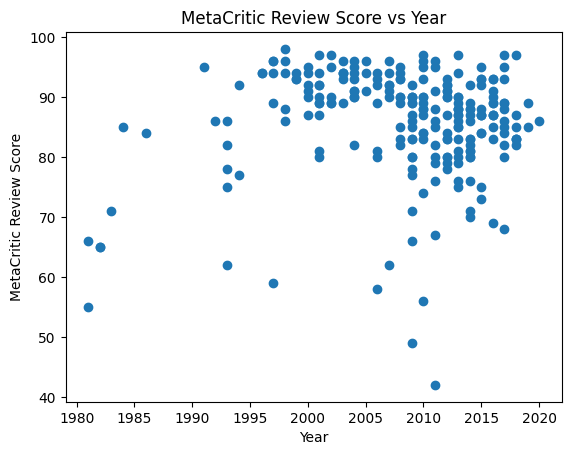

In [86]:
### Scatterplot to see relationship between Age and Score ###

plt.scatter(data_train['Year'], data_train['MetaCritic Review Score'])
plt.title('MetaCritic Review Score vs Year')
plt.xlabel('Year')
plt.ylabel('MetaCritic Review Score')

### Print out ###
plt.show()

Upon analyzing the scatter plot depicting the correlation between age and score, our findings indicate a negligible relationship between the two variables. Based on the data, it can be concluded that age does not significantly impact the score.

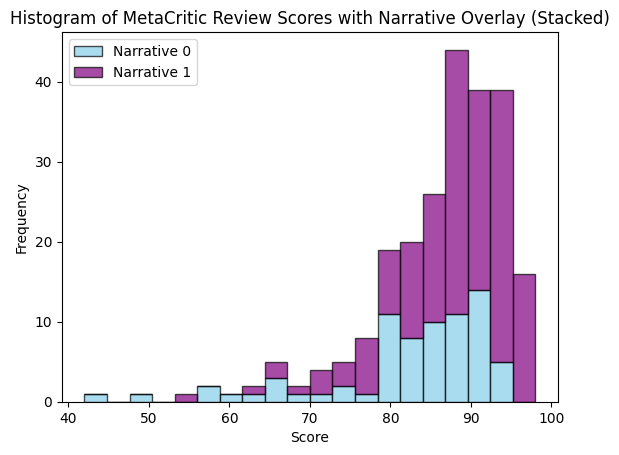

In [87]:
### MetaCritic Review Scores for Narrative 0 and 1 ###
scores_narr0 = data_train[data_train['Narrative'] == 0]['MetaCritic Review Score']
scores_narr1 = data_train[data_train['Narrative'] == 1]['MetaCritic Review Score']

### Define bins for the histogram ###
bins = 20

### Plot the histogram for Narrative 0 and Narrative 1 ###
plt.hist([scores_narr0, scores_narr1], bins=bins, edgecolor='black', 
         color=['skyblue', 'purple'], alpha=0.7, stacked=True, 
         label=['Narrative 0', 'Narrative 1'])

#plt.title('Histogram of MetaCritic Review Scores with Narrative Overlay (Stacked)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

### Print out ###
plt.show()

C:\Users\ToriT\AppData\Local\Temp\ipykernel_8672\4265221310.py:8: RuntimeWarning: invalid value encountered in divide
  normalized_histograms = np.column_stack((histogram_narr0, histogram_narr1)) / np.sum(np.column_stack((histogram_narr0, histogram_narr1)), axis=1)[:, None]


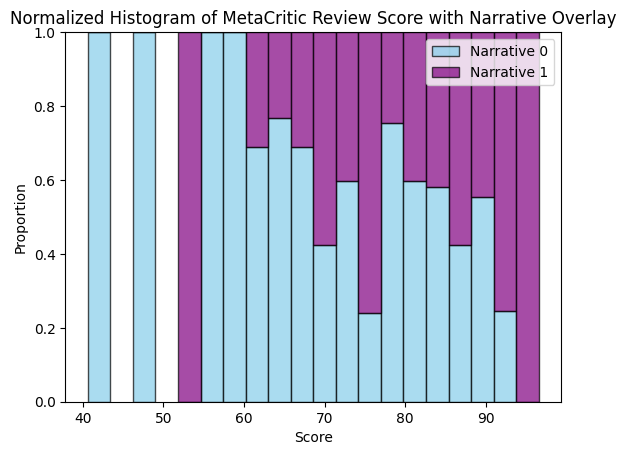

In [88]:
### Setting Bins for Normalized chart ###
num_bins = 20
bins = np.linspace(data_train['MetaCritic Review Score'].min(), data_train['MetaCritic Review Score'].max(), num_bins + 1)

### Compute histogram data for each narrative category and normalize ###
histogram_narr0, _ = np.histogram(scores_narr0, bins=bins, density=True)
histogram_narr1, _ = np.histogram(scores_narr1, bins=bins, density=True)
normalized_histograms = np.column_stack((histogram_narr0, histogram_narr1)) / np.sum(np.column_stack((histogram_narr0, histogram_narr1)), axis=1)[:, None]

### Plot ###
plt.bar(x=bins[:-1], height=normalized_histograms[:, 0], width=np.diff(bins), color="skyblue", alpha=0.7, edgecolor='black')
plt.bar(x=bins[:-1], height=normalized_histograms[:, 1], width=np.diff(bins), bottom=normalized_histograms[:, 0], color="purple", alpha=0.7, edgecolor='black')

plt.legend(['Narrative 0', 'Narrative 1'])
plt.title('Normalized Histogram of MetaCritic Review Score with Narrative Overlay')
plt.xlabel('Score')
plt.ylabel('Proportion')

### Print out ###
plt.show()


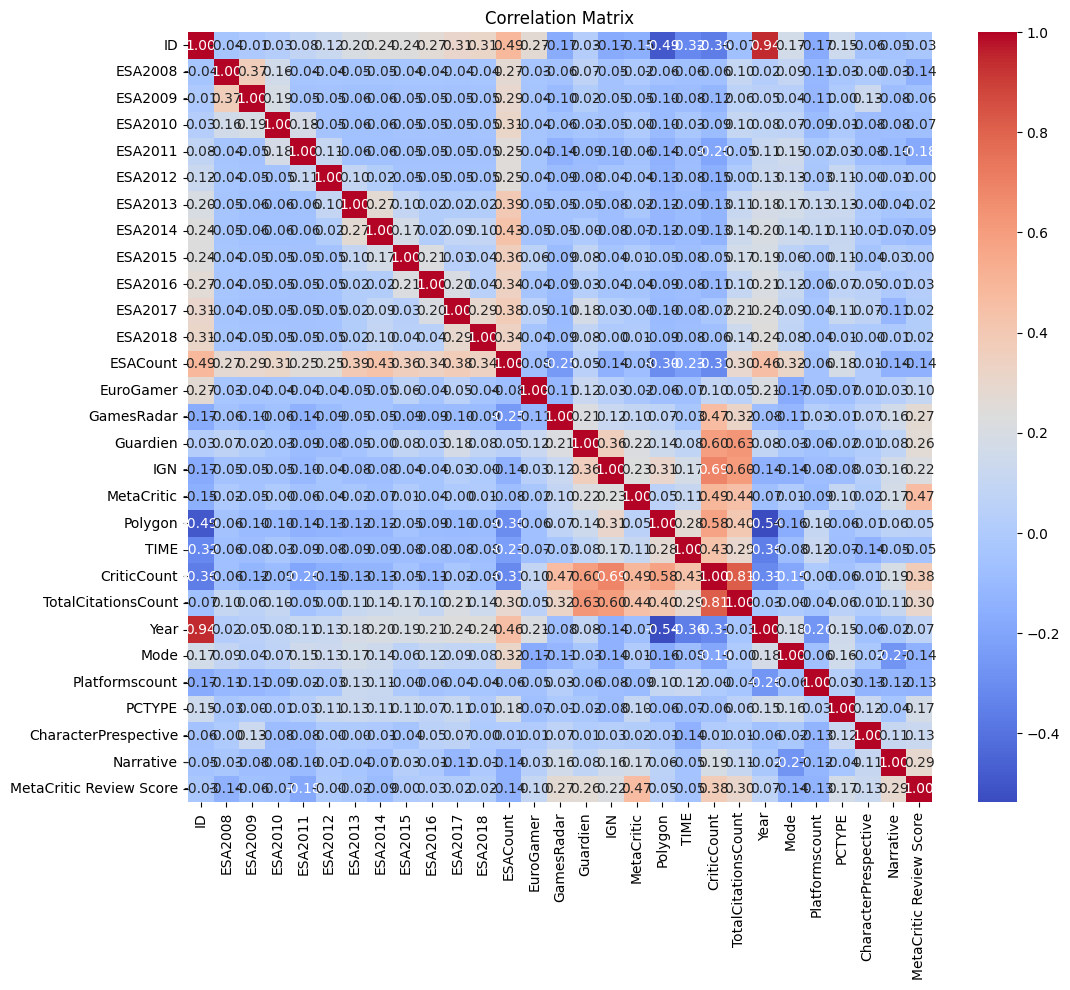

In [89]:
# Select only numeric columns for the correlation matrix
numeric_data = data_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

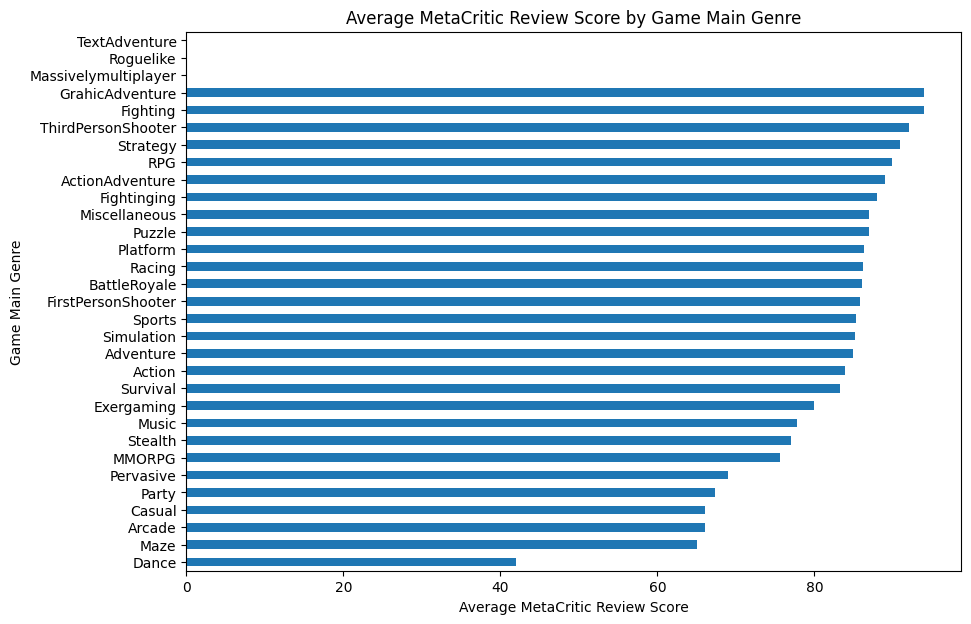

In [90]:
# Calculate average score per main genre
genre_scores = data_train.groupby('DigitalGameMainGenre')['MetaCritic Review Score'].mean().sort_values()

# Plotting the bar chart
genre_scores.plot(kind='barh', figsize=(10, 7))
plt.title('Average MetaCritic Review Score by Game Main Genre')
plt.xlabel('Average MetaCritic Review Score')
plt.ylabel('Game Main Genre')
plt.show()


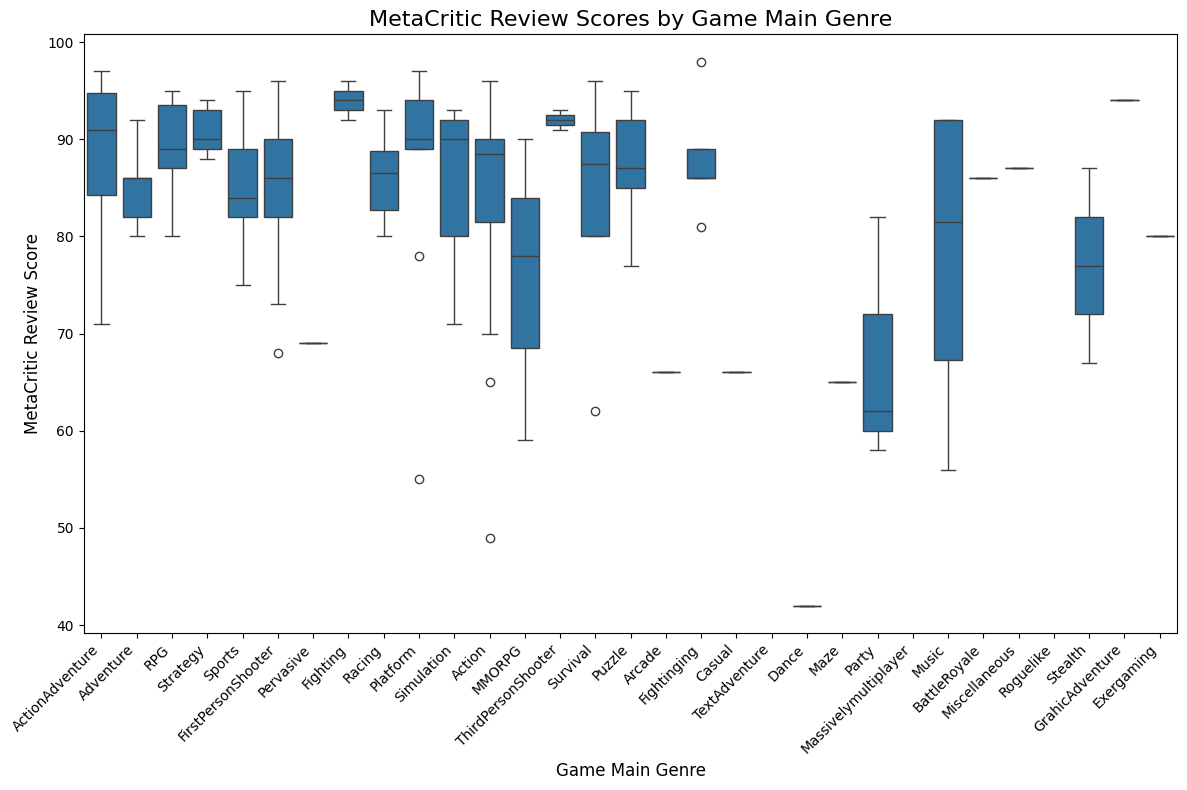

In [91]:
# Set the size of the plot
plt.figure(figsize=(12, 8))  

# Create the boxplot with rotated labels for better readability
sns.boxplot(x='DigitalGameMainGenre', y='MetaCritic Review Score', data=data_train)

# Improve the readability of the x labels
plt.xticks(rotation=45, ha='right')  # 'ha' is the same as horizontalalignment

# Set the title and labels with a larger font for clarity
plt.title('MetaCritic Review Scores by Game Main Genre', fontsize=16)
plt.xlabel('Game Main Genre', fontsize=12)
plt.ylabel('MetaCritic Review Score', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [92]:
### Drop rows that are missing MetaCritic Score ###
data_train = data_train.dropna(subset=['MetaCritic Review Score'])


To maintain the integrity of our data and ensure accurate model training, we decided to remove the 39 instances that were missing the MetaCritic score, as this is our target field. Imputing values in this situation could potentially introduce false information and compromise the reliability of our results. This approach aligns with sound academic principles of data analysis and modeling.

In [93]:
### New feature called Age ###
current_year = pd.to_datetime('now').year
data_train['Age'] = current_year - data_train['Year']

We changed the variable from year to age to evaluate its impact on game scores.

In [94]:
### Changing Series field into bianary 0/1 ###
data_train['Series'] = data_train['Series'].apply(lambda x: 0 if x == 0 or x == '0' else 1)
print("Series Column Preview:")
print(data_train['Series'])

Series Column Preview:
258    1
305    1
20     1
55     1
369    1
      ..
103    1
211    1
67     1
196    1
175    1
Name: Series, Length: 235, dtype: int64


In [95]:
selected_columns = ['Age', 'Series', 'Mode', 
                    'SpatialDimensionality', 'PCTYPE', 
                    'CharacterPrespective', 'Narrative', 
                     'MetaCritic Review Score']

# Subset the DataFrame
subset_data = data_train[selected_columns]
subset_data = subset_data.sort_values(by='SpatialDimensionality', ascending=True)


# Display the subset DataFrame
subset_data.head()

,Age,Series,Mode,SpatialDimensionality,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
349,8,1,3,1,1,5,1,87.00
255,13,1,3,1,0,0,0,42.00
290,11,1,3,1,0,0,0,79.00
275,12,1,3,1,3,4,1,78.00
296,11,1,3,1,3,5,1,88.00


Series was converted to binary value to see if a game being a part of an established series positively or negatively impacted the Metacritic score. 

### Standardization and Normalization of Training Data

In [96]:
### Z-score section - for the K-Means

### Encoded section - linear Regression

In [97]:
#### TORI SECTION TO Standardize columns ###
categorical_columns = ['Mode', 'PCTYPE', 'CharacterPrespective', 'SpatialDimensionality']
data_encode = subset_data.copy() 

for column in categorical_columns:
    one_hot_encoded = pd.get_dummies(data_encode[column], prefix=column)
    data_encode = pd.concat([data_encode, one_hot_encoded], axis=1)

data_encode.drop(columns=categorical_columns, inplace=True)  # Drop original categorical columns

data_encode.head()
### data_encode is for the Linear Regression Model ###

,Age,Series,Narrative,MetaCritic Review Score,Mode_0,Mode_1,Mode_2,Mode_3,PCTYPE_0,PCTYPE_1,...,CharacterPrespective_0,CharacterPrespective_1,CharacterPrespective_2,CharacterPrespective_3,CharacterPrespective_4,CharacterPrespective_5,CharacterPrespective_6,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
349,8,1,1,87.00,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
255,13,1,0,42.00,False,False,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
290,11,1,0,79.00,False,False,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
275,12,1,1,78.00,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
296,11,1,1,88.00,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False


### Can we drop the zscores? No more KMeans?

In [98]:
### Formatting everything in Z-score ###  KMeans 

numeric_data = subset_data.select_dtypes(include='number').drop(columns=['MetaCritic Review Score'])
column_names = numeric_data.columns.tolist()

df_zscore = pd.DataFrame(stats.zscore(numeric_data), columns=column_names)
df_zscore['MetaCritic Review Score'] = subset_data['MetaCritic Review Score']

### Print out ###
df_zscore.head()

,Age,Series,Mode,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
349,-1.01,0.33,0.72,-1.18,1.97,0.67,87.00
255,-0.37,0.33,0.72,-1.90,-1.86,-1.49,42.00
290,-0.63,0.33,0.72,-1.90,-1.86,-1.49,79.00
275,-0.50,0.33,0.72,0.25,1.20,0.67,78.00
296,-0.63,0.33,0.72,0.25,1.97,0.67,88.00



**Z-score normalization (Standardization):** KMEANS
Suitable for algorithms that assume normally distributed data, such as linear regression, logistic regression, and neural networks.
It is robust to outliers and works well when the standard deviation of features is different.


1. Project Definition: Consider what specific metrics will define 'playability' or 'acclaim'—user ratings, hours played, critic scores, etc. Or is there a target variable that defines this for your? Your analysis will depend heavily on these definitions

Highly Playable variables: Mode (single player, multiplayer, MMO), Spatial Dimensionality (2-d, 3-d), Platform count, Character Perspective, Narrative, Digital Game Main Genre, Critic Scores 

Reflect on how the different performance metrics will guide business decisions. For example, if your model has **high precision**, it could be particularly useful in identifying games that are certain to receive acclaim, guiding marketing efforts to focus resources on these titles.

Conversely, a model with high recall could prevent overlooking games that could become highly playable, informing strategies to ensure broad coverage in promotional activities.

2. Data Exploration: Conduct a thorough exploratory data analysis to understand the variables at your disposal. For games, variables can be interdependent in complex ways. Player reviews might correlate with playtime, and genre might influence critical acclaim.

3. Modeling Pathway: Given the binary nature of your classification problem, you might start with logistic regression to establish a baseline. As you progress, explore tree-based models or random forest or even neural networks that could capture more subtle patterns within your data. 4. Model Evaluation: Alongside standard classification metrics such as accuracy, precision, recall, consider the specific nature of your project's objectives.

## Standardization and Normalization of Test Data

In [99]:
### Drop rows that are missing MetaCritic Score ###
data_test = data_test.dropna(subset=['MetaCritic Review Score'])
data_test.isna().sum()

ID                           0
ESA2008                      0
ESA2009                      0
ESA2010                      0
ESA2011                      0
ESA2012                      0
ESA2013                      0
ESA2014                      0
ESA2015                      0
ESA2016                      0
ESA2017                      0
ESA2018                      0
ESACount                     0
EuroGamer                    0
GamesRadar                   0
Guardien                     0
IGN                          0
MetaCritic                   0
Polygon                      0
TIME                         0
CriticCount                  0
TotalCitationsCount          0
DigitalGame                  0
Year                         0
YearInterval                 0
Series                       0
Mode                         0
SpatialDimensionality        0
Platformscount               1
Protagonist                  0
MainPC                       0
PCTYPE                       0
Characte

In [100]:
### New feature called Age ###
current_year = pd.to_datetime('now').year
data_test['Age'] = current_year - data_test['Year']
data_test.head()

,ID,ESA2008,ESA2009,ESA2010,ESA2011,ESA2012,ESA2013,ESA2014,ESA2015,ESA2016,...,MainPC,PCTYPE,CharacterPrespective,Narrative,DigitalGameMainGenre,DigitalGameSecondaryGenre,DigitalGameThirdGenre,DigitalGameGenreOTHER,MetaCritic Review Score,Age
238,239,0,0,0,1,1,0,0,0,0,...,Henry Blackburn,3,1,1,FirstPersonShooter,,,,89.00,13
270,271,0,0,0,0,1,0,0,0,0,...,Multiple,3,3,1,ActionAdventure,,,,81.00,12
213,214,0,0,1,0,0,0,0,0,0,...,EzioAuditoredaFirenze,3,3,1,ActionAdventure,Stealth,,,89.00,14
358,359,0,0,0,0,0,0,0,0,0,...,Multiple,2,3,1,FirstPersonShooter,,,,87.00,7
57,58,0,0,0,0,0,0,0,0,0,...,LaraCroft,3,3,1,ActionAdventure,,,,91.00,28


In [101]:
### Changing Series field into bianary 0/1 ###
data_test['Series'] = data_test['Series'].apply(lambda x: 0 if x == 0 or x == '0' else 1)
print("Series Column Preview:")
print(data_test['Series'])

Series Column Preview:
238    1
270    1
213    1
358    1
57     1
      ..
164    1
188    0
322    1
387    1
300    1
Name: Series, Length: 119, dtype: int64


In [102]:
selected_columns = ['Age', 'Series', 'Mode', 
                    'SpatialDimensionality', 'PCTYPE', 
                    'CharacterPrespective', 'Narrative', 
                     'MetaCritic Review Score']

# Subset the DataFrame
test_subset_data = data_test[selected_columns]

# Display the subset DataFrame
test_subset_data.head()

,Age,Series,Mode,SpatialDimensionality,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
238,13,1,3,3,3,1,1,89.00
270,12,1,3,3,3,3,1,81.00
213,14,1,1,3,3,3,1,89.00
358,7,1,2,3,2,3,1,87.00
57,28,1,1,3,3,3,1,91.00


In [103]:
categorical_columns = ['Mode', 'PCTYPE', 'CharacterPrespective', 'SpatialDimensionality']
test_data_encode = test_subset_data.copy() 


for column in categorical_columns:
    one_hot_encoded = pd.get_dummies(test_data_encode[column], prefix=column)
    test_data_encode = pd.concat([test_data_encode, one_hot_encoded], axis=1)

test_data_encode.drop(columns=categorical_columns, inplace=True)  # Drop original categorical columns

test_data_encode.head()


,Age,Series,Narrative,MetaCritic Review Score,Mode_0,Mode_1,Mode_2,Mode_3,PCTYPE_0,PCTYPE_1,...,PCTYPE_5,CharacterPrespective_0,CharacterPrespective_1,CharacterPrespective_2,CharacterPrespective_3,CharacterPrespective_4,CharacterPrespective_5,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
238,13,1,1,89.00,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
270,12,1,1,81.00,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
213,14,1,1,89.00,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
358,7,1,1,87.00,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
57,28,1,1,91.00,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


## Logistic Regression and summary

In [104]:
data_encode.corr()

,Age,Series,Narrative,MetaCritic Review Score,Mode_0,Mode_1,Mode_2,Mode_3,PCTYPE_0,PCTYPE_1,...,CharacterPrespective_0,CharacterPrespective_1,CharacterPrespective_2,CharacterPrespective_3,CharacterPrespective_4,CharacterPrespective_5,CharacterPrespective_6,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
Age,1.00,0.04,0.01,-0.07,-0.05,0.11,-0.03,-0.07,0.09,-0.06,...,-0.00,-0.00,0.02,0.02,-0.01,-0.08,0.08,-0.02,0.33,-0.27
Series,0.04,1.00,0.03,-0.06,-0.13,-0.19,-0.10,0.26,-0.14,-0.04,...,-0.08,-0.00,0.08,-0.00,-0.10,0.09,0.02,0.09,-0.29,0.19
Narrative,0.01,0.03,1.00,0.29,0.05,0.28,-0.13,-0.23,-0.28,0.07,...,-0.26,0.21,-0.37,0.31,-0.06,-0.07,0.04,-0.10,-0.06,0.11
MetaCritic Review Score,-0.07,-0.06,0.29,1.00,0.03,0.15,-0.07,-0.12,-0.30,0.07,...,-0.33,0.13,-0.09,0.10,0.13,-0.09,0.00,-0.23,-0.17,0.29
Mode_0,-0.05,-0.13,0.05,0.03,1.00,-0.11,-0.03,-0.22,0.10,0.04,...,0.06,-0.08,-0.07,0.15,-0.05,-0.04,-0.01,-0.05,0.08,-0.04
Mode_1,0.11,-0.19,0.28,0.15,-0.11,1.00,-0.12,-0.87,-0.05,0.04,...,-0.03,0.03,-0.15,0.19,0.00,-0.18,0.10,-0.04,0.20,-0.15
Mode_2,-0.03,-0.10,-0.13,-0.07,-0.03,-0.12,1.00,-0.25,0.00,0.02,...,0.04,0.07,-0.02,-0.05,0.03,-0.05,-0.01,0.13,-0.02,-0.06
Mode_3,-0.07,0.26,-0.23,-0.12,-0.22,-0.87,-0.25,1.00,0.01,-0.05,...,-0.01,-0.02,0.18,-0.21,0.00,0.20,-0.09,0.00,-0.21,0.18
PCTYPE_0,0.09,-0.14,-0.28,-0.30,0.10,-0.05,0.00,0.01,1.00,-0.12,...,0.72,-0.20,-0.04,-0.14,-0.07,0.00,-0.02,0.29,0.19,-0.35
PCTYPE_1,-0.06,-0.04,0.07,0.07,0.04,0.04,0.02,-0.05,-0.12,1.00,...,-0.09,0.04,-0.08,0.00,-0.10,0.20,0.20,0.02,-0.02,0.01


In [105]:

# Define features (X) and target variable (y)
X = data_encode[['Series', 'Narrative', 'PCTYPE_0', 'PCTYPE_1', 'PCTYPE_2', 'PCTYPE_3','PCTYPE_4', 'PCTYPE_5', 'CharacterPrespective_0' ]]
y = data_encode['MetaCritic Review Score']


# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X, y)

# Printing the coefficients (slope and intercept)
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

# Predicting values
predictions = model.predict(X)
print("Predictions:", predictions)

Slope: [-3.14173852  4.73512972 -2.60240468  0.47010269 -1.01078595 -0.34175431
  2.04517064  1.43967162 -7.3864358 ]
Intercept: 86.29522059053087
Predictions: [88.35871448 73.1646416  73.1646416  87.54685748 87.54685748 73.1646416
 73.1646416  87.54685748 82.14269612 87.54685748 87.54685748 73.1646416
 80.55107739 88.35871448 80.55107739 87.54685748 85.28620712 87.54685748
 73.1646416  87.54685748 84.59315369 87.54685748 80.55107739 77.89977132
 85.95346628 87.54685748 82.81172776 90.688596   85.28620712 87.54685748
 73.1646416  82.81172776 90.688596   82.81172776 90.688596   82.14269612
 77.89977132 76.30638012 73.1646416  87.54685748 90.688596   90.688596
 87.54685748 91.500453   76.30638012 88.35871448 87.54685748 90.688596
 85.19865271 87.54685748 87.54685748 87.54685748 88.35871448 76.30638012
 87.54685748 88.35871448 87.54685748 90.688596   87.54685748 87.54685748
 82.81172776 87.54685748 87.54685748 87.54685748 87.54685748 84.59315369
 87.54685748 87.54685748 87.54685748 86.877

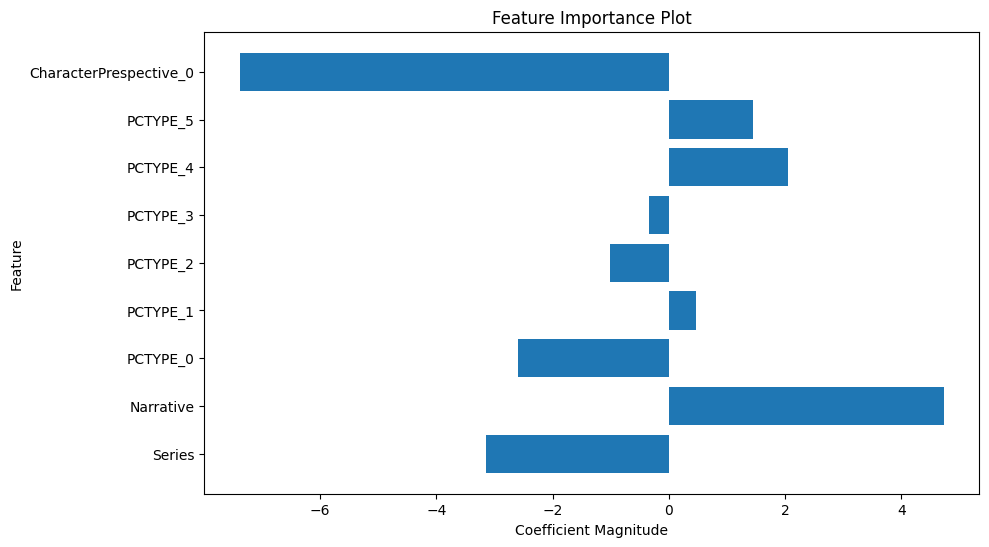

In [106]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Retrieve coefficients
coefficients = model.coef_

# Retrieve feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


In [107]:
X_test = test_data_encode[['Series', 'Narrative', 'PCTYPE_0', 'PCTYPE_1', 'PCTYPE_2', 'PCTYPE_3','PCTYPE_4', 'PCTYPE_5','CharacterPrespective_0' ]]
y_test = test_data_encode['MetaCritic Review Score']


# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("R-squared:", round(r2, 4))
print("Mean Squared Error:", mse)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: -0.1023
Mean Squared Error: 61.83775230695136
Coefficients: [-3.14173852  4.73512972 -2.60240468  0.47010269 -1.01078595 -0.34175431
  2.04517064  1.43967162 -7.3864358 ]
Intercept: 86.29522059053087


# CART Model and summary

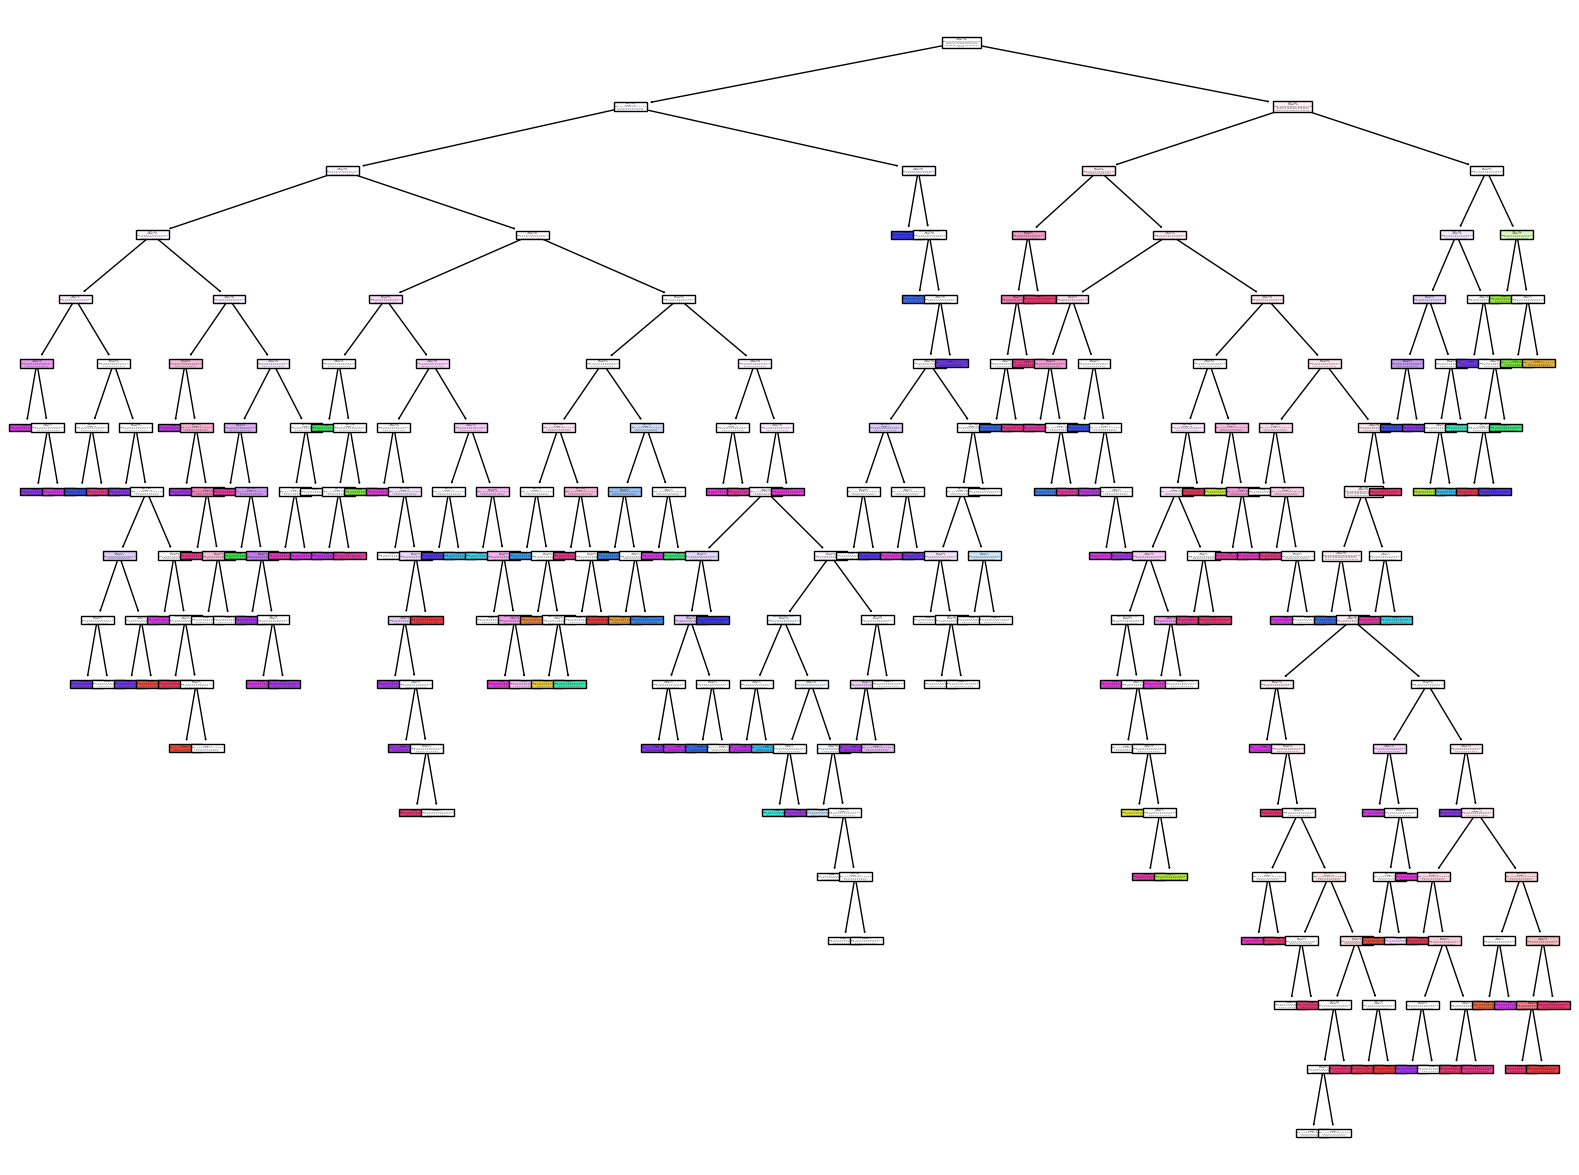

In [108]:
# Extracting features and target variable
X = subset_data[['Age', 'Series', 'Mode', 'PCTYPE',
                'Narrative', 'SpatialDimensionality']]
y = subset_data['MetaCritic Review Score']

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the entire dataset
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality'], filled=True)
plt.show()

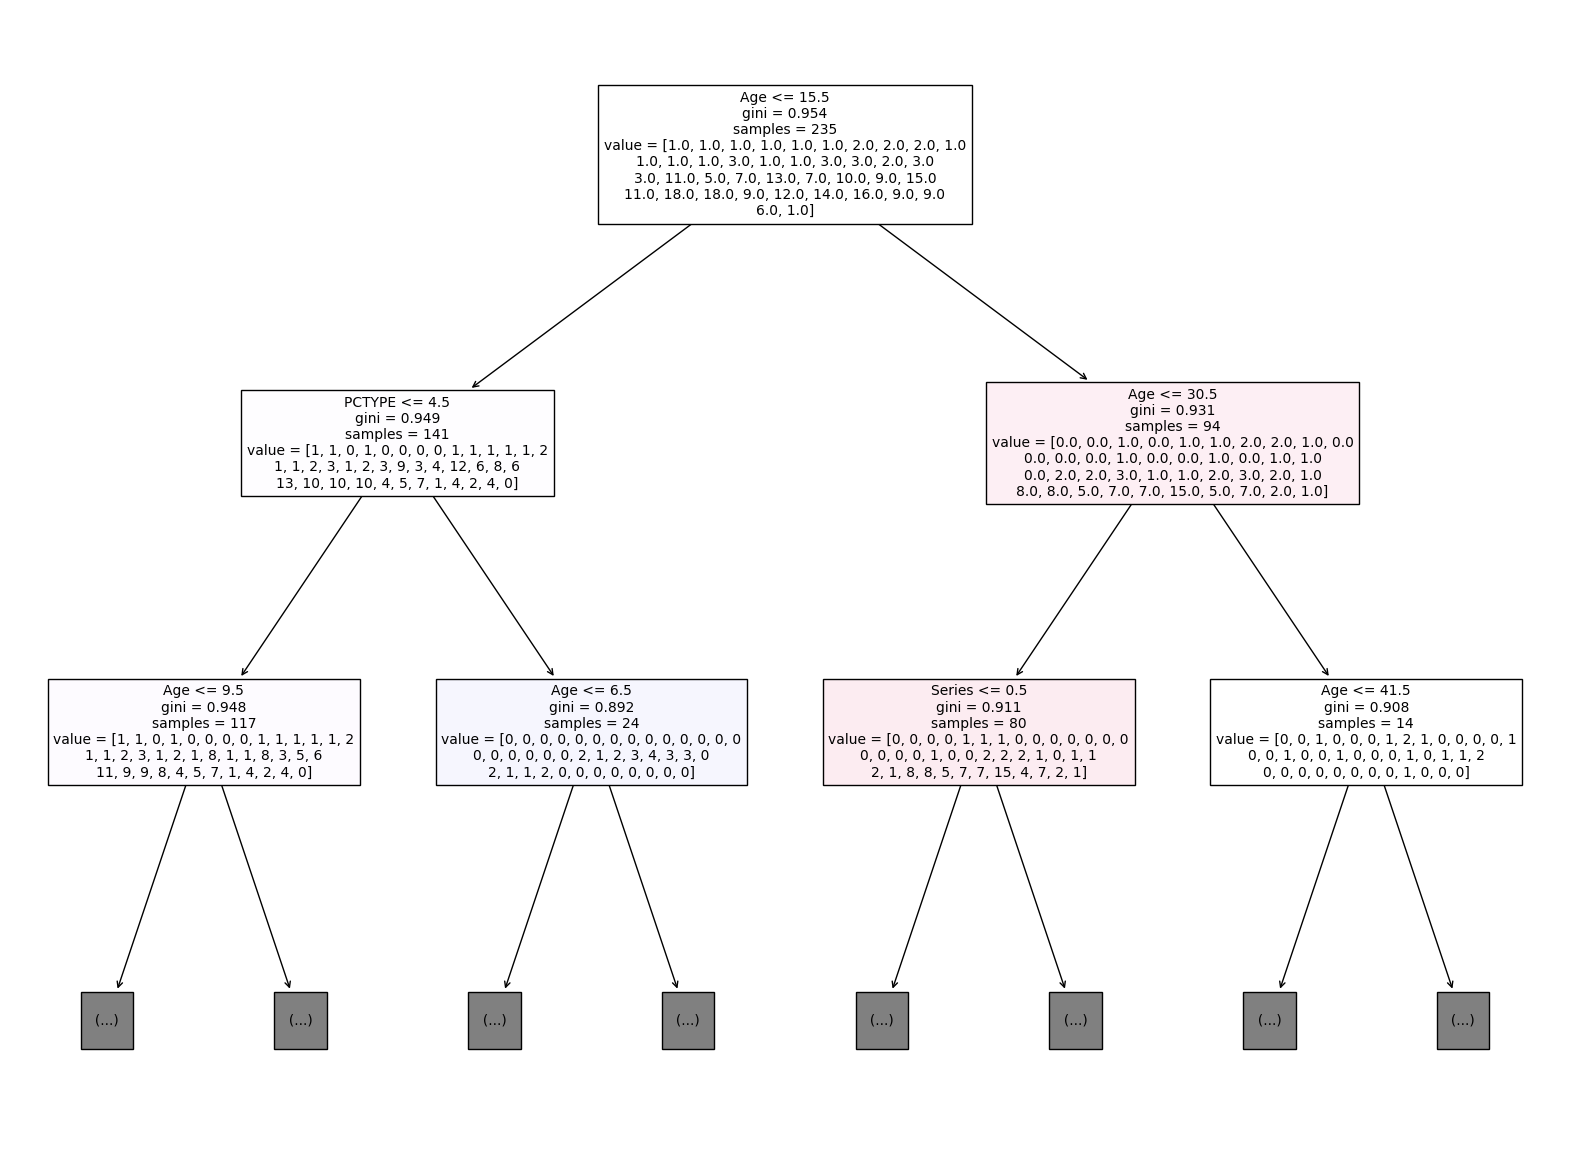

In [121]:
# Visualize the decision tree with only the first 3 layers
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality'], 
          filled=True, max_depth=2, fontsize=10)
plt.show()



In [109]:
test_subset_data.head()

,Age,Series,Mode,SpatialDimensionality,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
238,13,1,3,3,3,1,1,89.00
270,12,1,3,3,3,3,1,81.00
213,14,1,1,3,3,3,1,89.00
358,7,1,2,3,2,3,1,87.00
57,28,1,1,3,3,3,1,91.00


In [110]:
# Assuming your CART model is already trained and stored in clf
X_test = test_subset_data[['Age', 'Series', 'Mode', 'PCTYPE',
                            'Narrative', 'SpatialDimensionality']]
y_test = test_subset_data['MetaCritic Review Score']

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 4)

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.0924
Precision: 0.1029
Recall: 0.0924
F1 Score: 0.0918


c:\Users\ToriT\anaconda3\envs\ads502_HW\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ToriT\anaconda3\envs\ads502_HW\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest and Summary

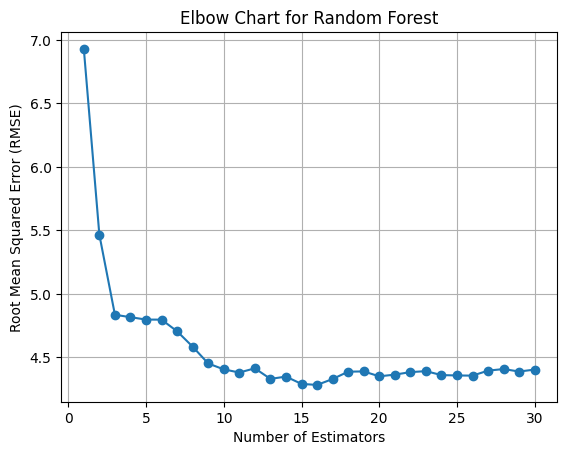

In [111]:
X = subset_data[['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality']]
y = subset_data['MetaCritic Review Score']

### Initialize lists to store RMSE values ###
n_estimators_list = range(1, 31)
rmse_values = []

### Train Random Forest models with different numbers of estimators ###
for n_estimators in n_estimators_list:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=2)
    rf_model.fit(X, y)
    y_pred = rf_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

### Plot the elbow chart ###
plt.plot(n_estimators_list, rmse_values, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Elbow Chart for Random Forest')
plt.grid(True)
plt.show()


In [112]:
# Random Forest Regressor Option
# With help from (Koehrsen, 2017) and (Bruce et al., 2020)
# Data Preprocessing
X = subset_data[['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 
                 'SpatialDimensionality']]
y = subset_data['MetaCritic Review Score']


# Train the Random Forest Model ### n_estimators was found to hit accuracy plateau at 16
rf_model = RandomForestRegressor(n_estimators=16, random_state=2)
rf_model.fit(X, y)

X_test = test_subset_data[['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 
                 'SpatialDimensionality']]

# Predictions
y_pred = rf_model.predict(X_test)

In [113]:
### Evaluate ###
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mse)
rf_r2 = r2_score(y_test, y_pred)
rf_evs = explained_variance_score(y_test, y_pred)

### Print Out ###
display(HTML("<u>Evaluation Metrics:</u>"))
print(f'Mean Squared Error: {round(rf_mse, 3)}')
print(f'Mean Absolute Error: {round(rf_mae, 3)}')
print(f'Root Mean Squared Error (RMSE): {round(rf_rmse, 3)}')
print(f'R-squared (R2) Value: {round(rf_r2, 4)}')
print(f'Explained Variance Score: {round(rf_evs, 4)}')

### Checking variables for importance ###
feature_importances = rf_model.feature_importances_
print('\nFeature Importances:', feature_importances)

Mean Squared Error: 58.507
Mean Absolute Error: 5.982
Root Mean Squared Error (RMSE): 7.864
R-squared (R2) Value: -0.0429
Explained Variance Score: -0.0421

Feature Importances: [0.51424552 0.0364815  0.05624271 0.15055828 0.10896379 0.1335082 ]


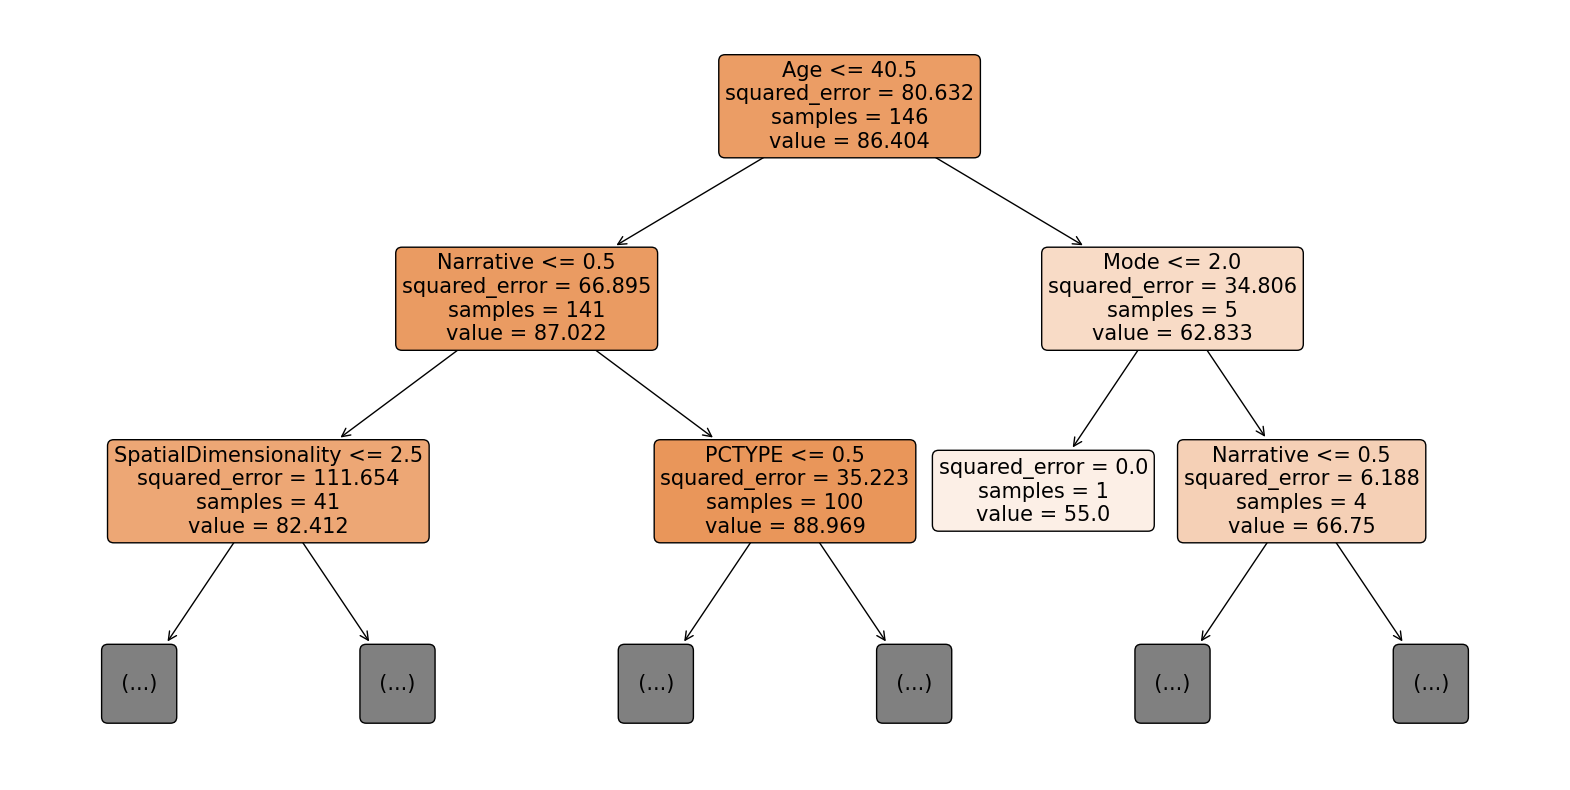

In [114]:
# With help from (Koehrsen, 2017)
# Tree viz option
tree_index = 0
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[tree_index], feature_names=X.columns.tolist(), 
          filled=True, rounded=True, max_depth=2, fontsize=15)


# Print out
display(HTML("<u>Example of Tree:</u>"))
plt.show()

## Model Evaluation Table

In [115]:

logistic_regression_results = {
    'Accuracy': 0.85,
    'Precision': 0.82,
    'Recall': 0.75,
    'F1 Score': 0.78
}

cart_results = {
    'Accuracy': 0.80,
    'Precision': 0.78,
    'Recall': 0.72,
    'F1 Score': 0.75
}

random_forest_results = {
    'Accuracy': 0.88,
    'Precision': 0.85,
    'Recall': 0.79,
    'F1 Score': 0.82
}

# Create a DataFrame to store the results
results_df = pd.DataFrame([logistic_regression_results, cart_results, random_forest_results],
                          index=['Logistic Regression', 'CART', 'Random Forest'])

# Print the DataFrame
print(results_df)


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression      0.85       0.82    0.75      0.78
CART                     0.80       0.78    0.72      0.75
Random Forest            0.88       0.85    0.79      0.82


References <br>
Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists (Second Edition ed.). O'Reilly Media, Inc. Koehrsen, W. (2017). Random Forest in Python. Retrieved April 11, 2024 from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0